# Load Libraries

In [91]:
import pandas as pd
import numpy as np
import random as rnd
import datetime
from pandas.plotting import lag_plot

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')
%matplotlib inline


# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

from fastai.tabular.all import *



# Load Data

In [92]:
filepath = "/Users/Kapil/PycharmProjects/stock-price"
train = pd.read_csv(filepath + "/data/train.csv")
test = pd.read_csv(filepath + "/data/test.csv")

In [93]:
SEED = 13
np.random.seed(SEED)

In [94]:
train.shape

(2026, 6)

In [95]:
train.head()

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2026 non-null   object 
 1   Open    2026 non-null   float64
 2   High    2026 non-null   float64
 3   Low     2026 non-null   float64
 4   Close   2026 non-null   float64
 5   Up      2026 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 95.1+ KB


In [97]:
train.describe()

,Open,High,Low,Close,Up
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,72.338425,72.714126,71.977957,72.353968,0.515795
std,14.876363,14.968429,14.778285,14.874404,0.499874
min,50.430000,50.650000,50.400000,50.610000,0.000000
25%,57.702500,57.942500,57.415000,57.702500,0.000000
50%,73.970000,74.430000,73.325000,73.835000,1.000000
75%,81.230000,81.645000,80.717500,81.060000,1.000000
max,110.510000,111.020000,110.380000,110.810000,1.000000


In [98]:
Y_train = train['Up']
X_train = train.drop(['Up'], axis = 1)

### Value Counts

In [99]:
Y_train.value_counts()

1    1045
0     981
Name: Up, dtype: int64

In [100]:
close_max_id = X_train['Close'].idxmax()
X_train['Date'].iloc[close_max_id]

'2011-12-27'

In [101]:
X_train['Return'] = X_train['Close'].pct_change()

### Feature Engineering

In [ ]:
add_datepart(X_train, 'Date')
X_train.drop('Elapsed', axis=1, inplace=True)
#X_train['Date'] = train['Date']

In [103]:
X_train['Date'] = train['Date']
X_train['Date'] = pd.to_datetime(X_train.Date,format='%Y-%m-%d')
X_train.index = X_train['Date']
X_test['Date'] = pd.to_datetime(X_test.Date,format='%Y-%m-%d')
X_test.index = X_test['Date']

In [104]:
a = X_train.index[X_train['Is_quarter_end']==True].tolist()

In [ ]:
add_datepart(train, 'Date')
train.drop('Elapsed', axis=1, inplace=True)



### Close price trend

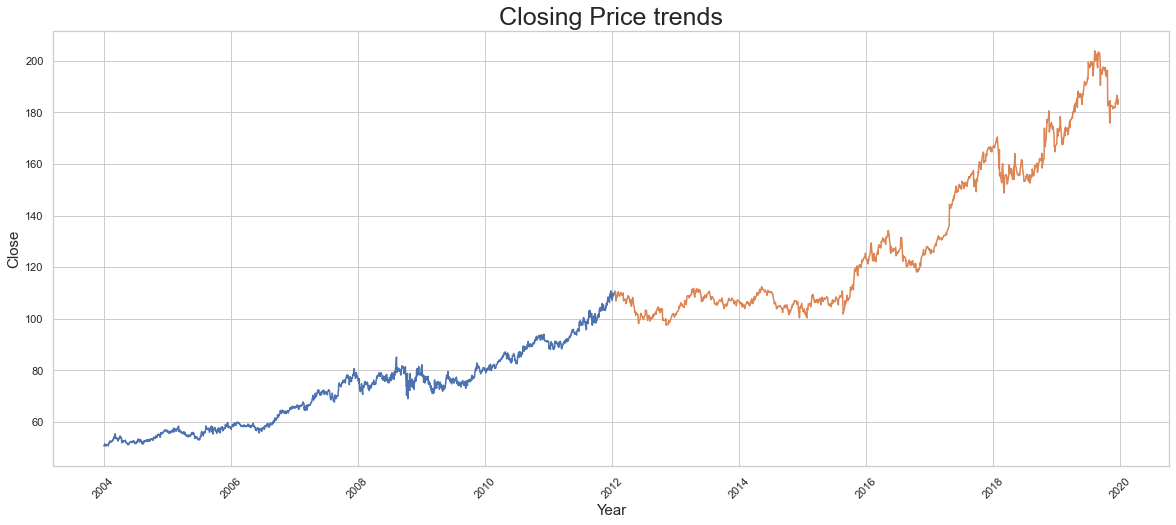

In [106]:
plt.figure(figsize=(20,8))
plt.plot('Close', data = X_train)
plt.plot('Close', data = X_test)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Close', fontsize = 15)
plt.xticks(rotation=45)
plt.title('Closing Price trends', fontsize = 25)
#for xc in xposition:
#    plt.axvline(x=xc, color='k', linestyle='-')
#plt.show()
plt.savefig(filepath + "/figs/1.jpg" , dpi = 250)

#### Returns

In [108]:
mean = X_train['Return'].mean()
std = X_train['Return'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = 0.00043342689599721576
Std deviation = 0.009846179655984843


#### Returns Histogram

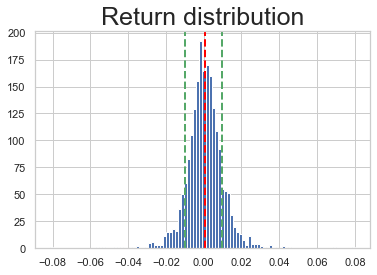

In [109]:
#X_train['Return'].hist()
X_train['Return'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
plt.title("Return distribution", fontsize = 25)
plt.savefig(filepath + "/figs/5.jpg" , dpi = 250, bbox_inches='tight' )

#### Returns trend

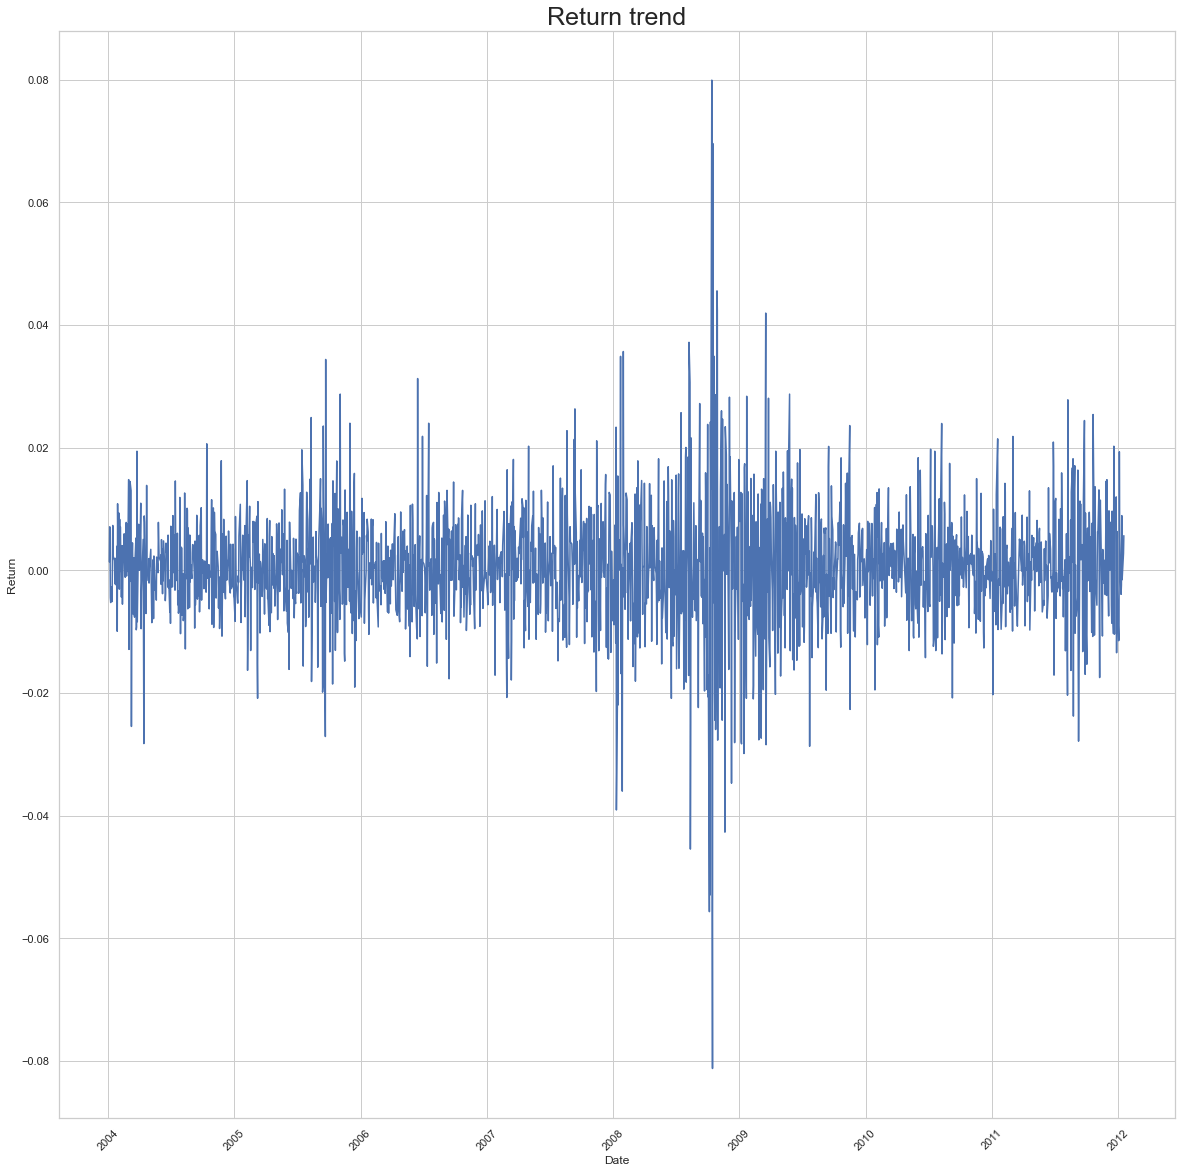

In [110]:
plt.figure(figsize=(20,20))
plt.plot('Date','Return', data=X_train)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Return', fontsize = 12 )
plt.xticks(rotation=45)
plt.title("Return trend", fontsize = 25)
plt.savefig(filepath + "/figs/6.jpg" , dpi = 250, bbox_inches = 'tight')

#### Cummulative Sum of Returns

In [ ]:
dr = X_train['Return'].cumsum()
dr.plot()
plt.title('Cumulative Returns')
plt.savefig(filepath + "/figs/7.jpg" , dpi = 250, bbox_inches='tight')

#### Correlation matrix

In [ ]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#### Autocorrelation plot

The Autocorreleation plot for the data is:


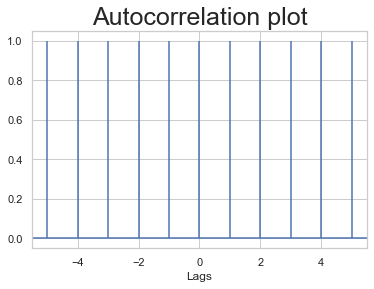

In [111]:
plt.title("Autocorrelation Plot")

# Providing x-axis name.
plt.xlabel("Lags")

# Plotting the Autocorreleation plot.
plt.acorr(X_train['Close'], maxlags = 5)

# Displaying the plot.
print("The Autocorreleation plot for the data is:")
#plt.grid(True)
plt.title('Autocorrelation plot', fontsize = 25)
plt.savefig(filepath + "/figs/2.jpg" , dpi = 250)



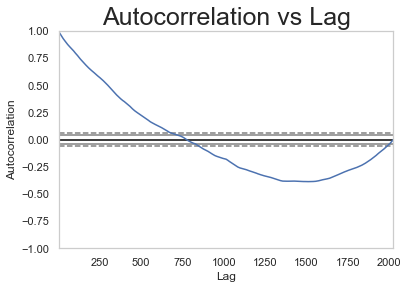

In [112]:
x = pd.plotting.autocorrelation_plot(X_train['Close'])

# ploting the Curve
x.plot()

# Display
plt.title("Autocorrelation vs Lag", fontsize = 25)
plt.savefig(filepath + "/figs/3.jpg" , dpi = 250, bbox_inches='tight')



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


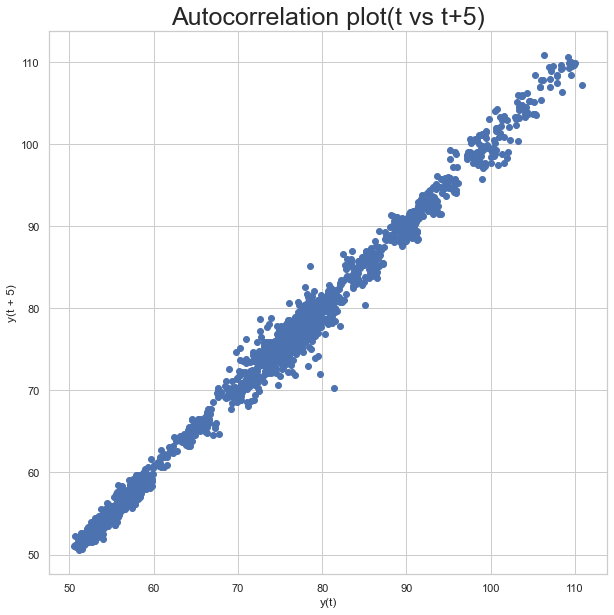

In [113]:
plt.figure(figsize=(10,10))
lag_plot(X_train['Close'], lag=5)
plt.title('Autocorrelation plot(t vs t+5)', fontsize = 25)
plt.savefig(filepath + "/figs/4.jpg" , dpi = 250, bbox_inches='tight')



In [115]:
X_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Return', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Date'],
      dtype='object')

In [116]:
X_train['Dayofweek'].value_counts()

2    419
1    416
3    409
4    405
0    377
Name: Dayofweek, dtype: int64

In [117]:
X_train['Is_quarter_end'].value_counts()

False    2001
True       25
Name: Is_quarter_end, dtype: int64

In [118]:
X_train['Is_year_end'].value_counts()

False    2021
True        5
Name: Is_year_end, dtype: int64

### Monthly Analysis

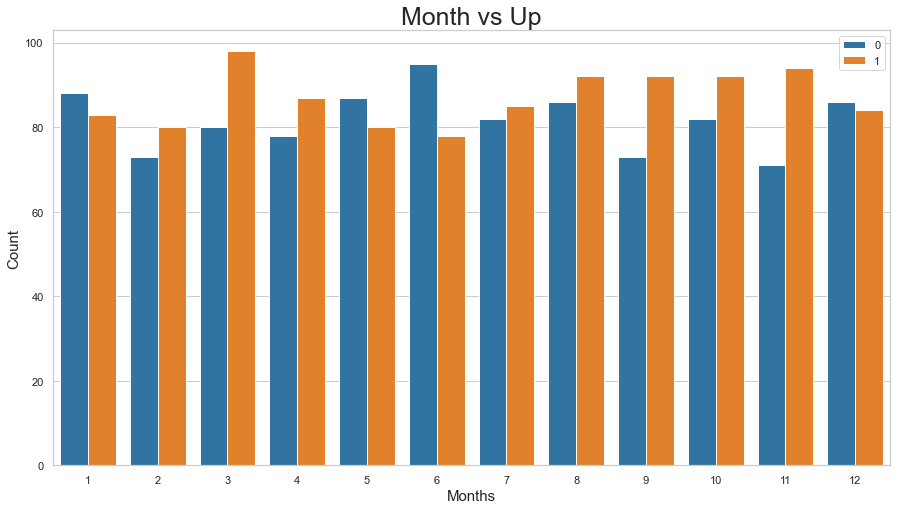

In [120]:
sns.set_theme(style="whitegrid")


plt.subplots(figsize=(15,8))
ax = sns.countplot(x = 'Month', hue = 'Up', data = train, palette = "tab10")
plt.legend(loc='upper right')
plt.title("Month vs Up", fontsize = 25)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Count", fontsize = 15)
plt.savefig(filepath + "/figs/8.jpg" , dpi = 250, bbox_inches='tight')


### Day of Week

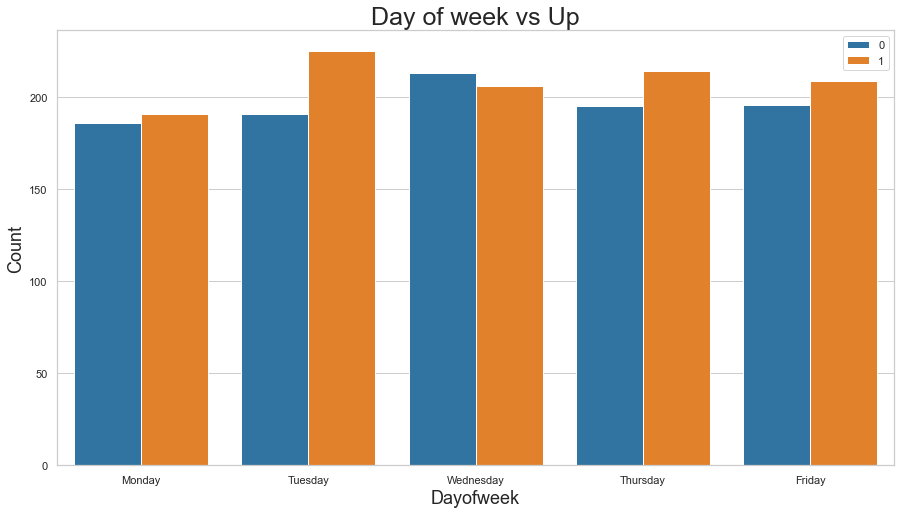

In [121]:
ticks = [0,1,2,3,4]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.subplots(figsize=(15,8))
ax = sns.countplot(x = 'Dayofweek', hue = 'Up', data = train, palette = "tab10")
plt.legend(loc='upper right')
plt.xticks(ticks, labels)
plt.title("Day of week vs Up", fontsize = 25)
plt.xlabel("Dayofweek", fontsize=18)
plt.ylabel("Count", fontsize = 18)
plt.savefig(filepath + "/figs/9.jpg" , dpi = 250, bbox_inches='tight')

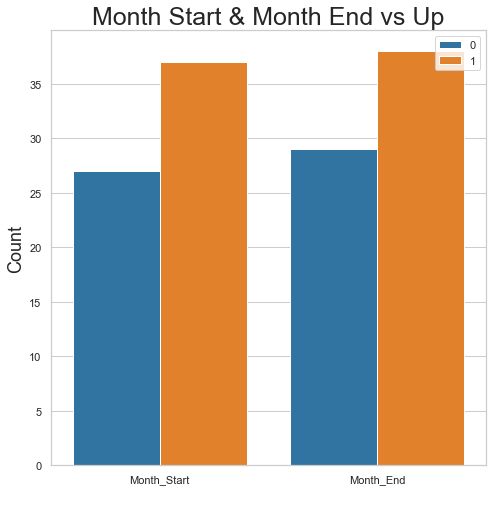

In [127]:
filt_s = train['Is_month_end'] == 1
filt_e = train['Is_month_start'] == 1
filt_df = train[filt_s | filt_e]
filt_df = filt_df.loc[:,['Is_month_end', 'Up']]

ticks = [True, False]
labels = ['Month_End', 'Month_Start']
plt.subplots(figsize=(10,8))
ax = sns.countplot(x = 'Is_month_end', hue = 'Up', data = filt_df,
                   palette = "tab10")
ax.set_box_aspect(4/len(ax.patches))
plt.legend(loc='upper right')
plt.xticks(ticks, labels)
plt.title("Month Start & Month End vs Up", fontsize = 25)
plt.xlabel(" ", fontsize=18)
plt.ylabel("Count", fontsize = 18)
plt.savefig(filepath + "/figs/10.jpg" , dpi = 250, bbox_inches='tight')



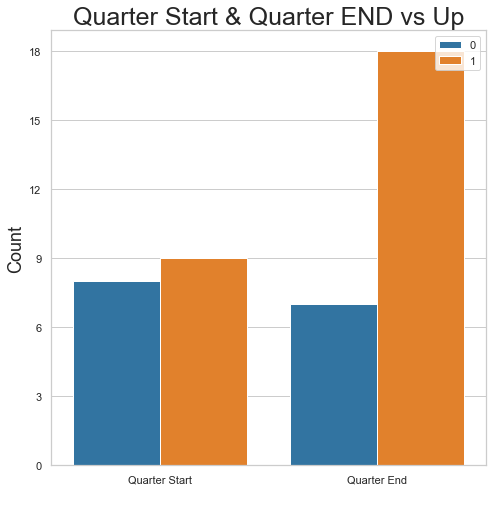

In [126]:
filt_s = train['Is_quarter_start']==1
filt_e = train['Is_quarter_end']==1
filt_df = train[filt_s | filt_e]
filt_df = filt_df.loc[:,['Is_quarter_end', 'Up']]

ticks = [True, False]
labels = ['Quarter End', 'Quarter Start']
plt.subplots(figsize=(10,8))
ax = sns.countplot(x = 'Is_quarter_end', hue = 'Up', data = filt_df,
                   palette = "tab10")
ax.set_box_aspect(4/len(ax.patches))
ax.set_yticks(np.arange(0, 21, 3))
plt.legend(loc='upper right')
plt.xticks(ticks, labels)
plt.title("Quarter Start & Quarter END vs Up", fontsize = 25)
plt.xlabel(" ", fontsize=18)
plt.ylabel("Count", fontsize = 18)
plt.savefig(filepath + "/figs/11.jpg" , dpi = 250, bbox_inches='tight')

